In [3]:
path_csv = 'C:/Users/Сократ/Downloads/Autoregression-master/Autoregression-master/daily-min-temperatures.csv'

# Датасет описывает минимальные дневные температуры за 10 лет (1981-1990) в городе Мельбурн, Австралия.

            Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8


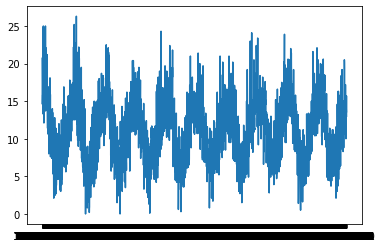

In [7]:
from pandas import read_csv
from matplotlib import pyplot as plt
series = read_csv(path_csv, header=0, index_col=0)
print(series.head())
plt.plot(series)
# series.plot()
plt.show()

# Быстрая проверка на автокорреляцию

#### Существует быстрая визуальная проверка, которую мы можем сделать, чтобы увидеть, есть ли автокорреляция в нашем наборе данных временных рядов.

Мы можем построить наблюдение на предыдущем временном шаге (t-1) с наблюдением на следующем временном шаге (t+1) в виде точечной диаграммы.
Это можно сделать вручную, сначала создав лаговую версию набора данных временных рядов и используя встроенную функцию точечной диаграммы в библиотеке Pandas lag_plot().
Ниже приведен пример создания графика запаздывания набора данных минимальных дневных температур.

Выполнение примера отображает данные о температуре (t) по оси x в сравнении с температурой
предыдущего дня (t-1) по оси y.

# Даты с 1981 по 1990 года


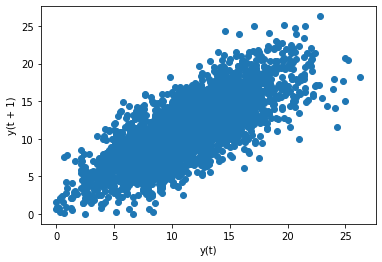

In [3]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import lag_plot
series = read_csv(path_csv, header=0, index_col=0)
lag_plot(series)
pyplot.show()

Мы можем видеть большой круг наблюдений вдоль диагональной линии графика. Это ясно показывает взаимосвязь или некоторую корреляцию.

Этот процесс может быть повторен для любого другого лага, например, если бы мы хотели проанализировать взаимосвязь с последними 7 днями или с тем же днем в прошлом месяце или в прошлом году.

Еще одна быстрая проверка, которую мы можем сделать, - это непосредственно вычислить корреляцию между наблюдением и лагом.

Мы можем использовать статистический тест, такой как коэффициент корреляции Пирсона. Это дает число для суммирования того, как коррелируют две переменные между -1 (отрицательно коррелированные) и +1 (положительно коррелированные) с небольшими значениями, близкими к нулю, указывающими на низкую корреляцию, и высокими значениями выше 0,5 или ниже -0,5, показывающими высокую корреляцию.

Корреляцию можно легко вычислить с помощью функции corr() в кадре данных запаздывающего набора данных.

В приведенном ниже примере создаются лаги набора данных минимальных дневных температур и вычисляется матрица корреляции каждого столбца с другими столбцами, включая его самого.

In [4]:
from pandas import read_csv
from pandas import DataFrame
from pandas import concat
from matplotlib import pyplot
series = read_csv(path_csv, header=0, index_col=0)
values = DataFrame(series.values)
dataframe = concat([values.shift(1), values], axis=1)
dataframe.columns = ['t-1', 't+1']
result = dataframe.corr()
print(result)

         t-1      t+1
t-1  1.00000  0.77487
t+1  0.77487  1.00000


Это показывает сильную положительную корреляцию (0,77) между наблюдением и значением лаг=1.

Это хорошо для одноразовых проверок, но утомительно, если мы хотим проверить большое количество лагов в наших временных рядах.

Далее мы рассмотрим расширенную версию этого подхода.

## Графики автокорреляции

Мы можем построить коэффициент корреляции для каждого лага.

Это может очень быстро дать представление о том, какие лаги могут быть хорошими кандидатами для использования в прогностической модели и как со временем меняется взаимосвязь между наблюдением и его историческими значениями.

Мы могли бы вручную рассчитать значения корреляции для каждого лага и построить график результата. К счастью, Pandas предоставляет встроенный график, называемый функцией autocorrelation_plot().

На графике показано число задержек по оси x и значение коэффициента корреляции между -1 и 1 по оси y. График также включает сплошные и пунктирные линии, которые указывают 95 % и 99 % доверительный интервал для значений корреляции. Значения корреляции выше этих линий более значимы, чем значения ниже линии, обеспечивая пороговое значение или ограничение для выбора более релевантных значений лагов.


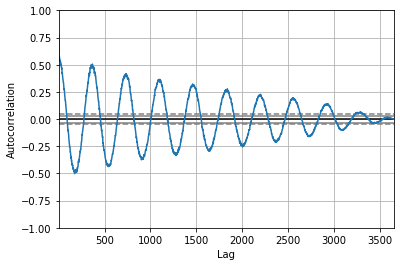

In [5]:
from pandas import read_csv
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot
series = read_csv(path_csv, header=0, index_col=0)
autocorrelation_plot(series)
pyplot.show()

Выполнение примера показывает колебания в положительной и отрицательной корреляции по мере изменения значений температуры в течение летнего и зимнего сезонов каждого предыдущего года.

Библиотека statsmodels также предоставляет версию графика в функции plot_acf() в виде линейного графика.

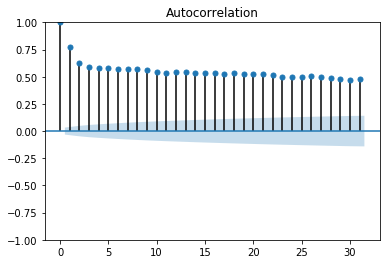

In [6]:
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.graphics.tsaplots import plot_acf
series = read_csv(path_csv, header=0, index_col=0)
plot_acf(series, lags=31)
pyplot.show()

В этом примере мы ограничиваем лаги, оцененные до 31, для удобства чтения.

Теперь, когда мы знаем, как просмотреть автокорреляцию в наших временных рядах, давайте рассмотрим ее моделирование с помощью авторегрессии.

Прежде чем мы это сделаем, давайте установим базовую производительность.

## Модель авторегрессии

Модель авторегрессии - модель временных рядов, в которой значения временного ряда в данный момент линейно зависят от предыдущих значений этого же ряда.

Мы могли бы рассчитать модель линейной регрессии вручную, используя класс LinearRegession в scikit-learn, и вручную указать входные переменные лага для использования.

Кроме того, библиотека statsmodels предоставляет модель авторегрессии, в которой необходимо указать соответствующее значение задержки, и обучает модель линейной регрессии. Это предусмотрено в классе AutoReg.

Мы можем использовать эту модель, сначала создав модель AutoReg(), а затем вызвав fit(), чтобы обучить ее на нашем наборе данных. Это возвращает объект авторегрессии.

После подгонки мы можем использовать модель для прогнозирования, вызвав функцию predict() для ряда наблюдений в будущем. Это создает один 7-дневный прогноз.

Полный пример приведен ниже.

Коэффициенты: [ 5.57543506e-01  5.88595221e-01 -9.08257090e-02  4.82615092e-02
  4.00650265e-02  3.93020055e-02  2.59463738e-02  4.46675960e-02
  1.27681498e-02  3.74362239e-02 -8.11700276e-04  4.79081949e-03
  1.84731397e-02  2.68908418e-02  5.75906178e-04  2.48096415e-02
  7.40316579e-03  9.91622149e-03  3.41599123e-02 -9.11961877e-03
  2.42127561e-02  1.87870751e-02  1.21841870e-02 -1.85534575e-02
 -1.77162867e-03  1.67319894e-02  1.97615668e-02  9.83245087e-03
  6.22710723e-03 -1.37732255e-03]
предсказанный=11.871275, ожидаемый=12.900000
предсказанный=13.053794, ожидаемый=14.600000
предсказанный=13.532591, ожидаемый=14.000000
предсказанный=13.243126, ожидаемый=13.600000
предсказанный=13.091438, ожидаемый=13.500000
предсказанный=13.146989, ожидаемый=15.700000
предсказанный=13.176153, ожидаемый=13.000000
Ошибка: 1.225


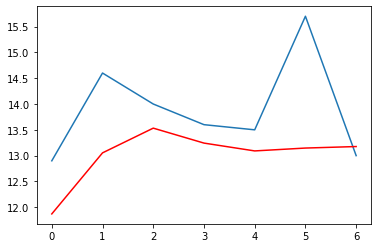

In [23]:
# create and evaluate a static autoregressive model
# !pip install statsmodels --user --upgrade 
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# Датасет
series = read_csv(path_csv, header=0, index_col=0, parse_dates=True, squeeze=True)
# Разбиваем на тренировочные и тестове данные
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# train autoregression
model = AutoReg(train, lags=29)
model_fit = model.fit()
print('Коэффициенты: %s' % model_fit.params)
# Предсказания
predictions = model_fit.predict(start=len(train), end=len(train)+len(test)-1, dynamic=False)
for i in range(len(predictions)):
	print('предсказанный=%f, ожидаемый=%f' % (predictions[i], test[i]))
rmse = sqrt(mean_squared_error(test, predictions))
print('Ошибка: %.3f' % rmse)
# plot results
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Прогноз на 7 дней среднеквадратичная ошибка прогноза.
Синие - ожидаемые,
Красные - прогнозируемые значения

Прогноз действительно выглядит довольно хорошо (около 1 градуса Цельсия каждый день),но с большим отклонением на 5-й день.

Поскольку statsmodels не позволяет легко обновлять модель по мере появления новых наблюдений, то было бы правильнее переобучать модель AutoReg каждый день по мере поступления новых наблюдений, и это может быть приемлемым подходом, если вычислительных мощностей достаточно

Альтернативой было бы использовать изученные коэффициенты и вручную делать прогнозы. Для этого необходимо сохранить историю 30 предыдущих наблюдений и извлечь коэффициенты из модели и использовать их в уравнении регрессии для составления новых прогнозов.

Нам просто нужно использовать коэффиценты в правильном порядке в истории наблюдений.

y(t) = b0 + b1*X1 + b2*X2 ... bn*Xn

предсказанный=11.871688, ожидаемый=12.900000
предсказанный=13.658178, ожидаемый=14.600000
предсказанный=14.350017, ожидаемый=14.000000
предсказанный=13.428513, ожидаемый=13.600000
предсказанный=13.374599, ожидаемый=13.500000
предсказанный=13.480483, ожидаемый=15.700000
предсказанный=14.765917, ожидаемый=13.000000
Ошибка: 1.205


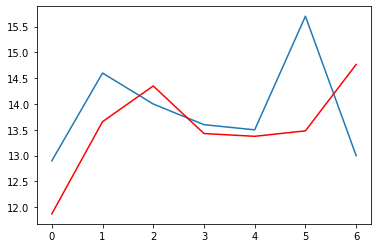

In [47]:

from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
# Датасет
series = read_csv(path_csv, header=0, index_col=0, parse_dates=True, squeeze=True)
# Разбиваем на тренировочные и тестове данные
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
# Обучение вторегрессии
window = 30
model = AutoReg(train, lags=30)
model_fit = model.fit()
coef = model_fit.params
# Прямой проход по временным интервалам в тестовом наборе
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = []
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('предсказанный=%f, ожидаемый=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Ошибка: %.3f' % rmse)
# plot
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

Опять же, при выполнении примера выводится прогноз и среднеквадратичная ошибка.

Мы видим небольшое улучшение прогноза при сравнении оценок ошибок.

предсказанный=12.307206, ожидаемый=12.900000
предсказанный=14.816851, ожидаемый=14.600000
предсказанный=14.169795, ожидаемый=14.000000
предсказанный=14.137865, ожидаемый=13.600000
предсказанный=14.253870, ожидаемый=13.500000
предсказанный=13.834704, ожидаемый=15.700000
предсказанный=15.127658, ожидаемый=13.000000
Ошибка: 1.152


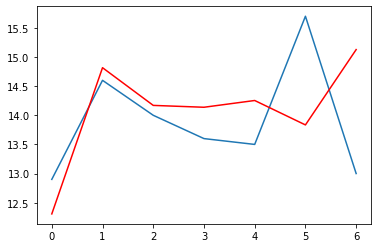

In [46]:
# create and evaluate an updated autoregressive model
from pandas import read_csv
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg
from sklearn.metrics import mean_squared_error
from math import sqrt
series = read_csv(path_csv, header=0, index_col=0, parse_dates=True, squeeze=True)
X = series.values
train, test = X[1:len(X)-7], X[len(X)-7:]
window = 229
model = AutoReg(train, lags=229)
model_fit = model.fit()
coef = model_fit.params
history = train[len(train)-window:]
history = [history[i] for i in range(len(history))]
predictions = []
for t in range(len(test)):
	length = len(history)
	lag = [history[i] for i in range(length-window,length)]
	yhat = coef[0]
	for d in range(window):
		yhat += coef[d+1] * lag[window-d-1]
	obs = test[t]
	predictions.append(yhat)
	history.append(obs)
	print('предсказанный=%f, ожидаемый=%f' % (yhat, obs))
rmse = sqrt(mean_squared_error(test, predictions))
print('Ошибка: %.3f' % rmse)
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()